In [1]:
import warnings
warnings.filterwarnings('ignore')

MNIST 손글씨 데이터셋을 사용해 단일 모델들을 앙상블 해서 투표를 통해 예측을 해본다.

In [2]:
from sklearn import datasets                         # MNIST 손글씨 데이터셋을 사용하기 위해 import 시킨다.
from sklearn import tree                             # 의사결정 트리
from sklearn.neighbors import KNeighborsClassifier   # kNN
from sklearn.svm import SVC                          # SVM
from sklearn.ensemble import VotingClassifier        # 하드 보팅, 소프트 보팅을 계산한다.
from sklearn.model_selection import train_test_split # 학습, 검증 데이터 분리
from sklearn.metrics import accuracy_score           # 정확도 계산

손글씨 데이터를 불러온다.

In [3]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
print(features.shape, labels.shape)

(1797, 64) (1797,)


In [4]:
# 학습 데이터, 테스트 데이터, 학습 데이터 결과, 테스트 데이터 결과
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2) 
print('학습 데이터 개수: {}, 테스트 데이터 개수: {}'.format(len(X_train), len(X_test)))

학습 데이터 개수: 1437, 테스트 데이터 개수: 360


단일 모델의 정확도 측정  
앙상블의 정확도를 측정하기에 핲서 단일 모델들의 정확도를 의사결정 트리, kNN, SVM 분류기를 만들어 정확도를 계산한다.

In [5]:
# 의사결정 트리
# 깃헙
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=8, max_features=32, random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

# kNN
# 깃헙
knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# SVM
# probability : 확률 추정치를 사용할지 여부를 지정한다. fit() 메소드를 호출하기 전에 저장해야 하며 실행 속도가 느려진다.
svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# 모델 예측 정확도(accuracy)
print('정확도')
print('dtree: {}'.format(accuracy_score(y_test, dtree_pred))) # 테스트 데이터 실제값, 예측값
print('knn:   {}'.format(accuracy_score(y_test, knn_pred)))
print('svm:   {}'.format(accuracy_score(y_test, svm_pred)))

정확도
dtree: 0.8111111111111111
knn:   0.8666666666666667
svm:   0.8583333333333333


확률 합계

In [11]:
# svm_prova = svm.predict_proba()

하드 보팅, 소프느 보팅은 VotingClassifier를 사용해 쉽게 구현할 수 있다.

하드 보팅  
하드 보팅은 일반적인 투표와 같이 각 분류기의 예측값들을 모아 가장 많은 투료를 받은 예측값으로 최종 결론을 내리는 방식이다. 

In [10]:
voting_clf= VotingClassifier(estimators=[('decision tree', dtree), ('knn', knn), ('svm', svm)], weights=[1,1,1],
                            voting='hard').fit(X_train, y_train)
hard_voting_pred = voting_clf.predict(X_test)
print('svm:   {}'.format(accuracy_score(y_test, hard_voting_pred)))

svm:   0.8972222222222223


소프트 보팅

In [13]:
voting_clf= VotingClassifier(estimators=[('decision tree', dtree), ('knn', knn), ('svm', svm)], weights=[1,1,1],
                            voting='soft').fit(X_train, y_train)
soft_voting_pred = voting_clf.predict(X_test)
print('svm:   {}'.format(accuracy_score(y_test, soft_voting_pred)))

svm:   0.9111111111111111


단일 모델과 앙상블 모델의 정확도 비교 신격화

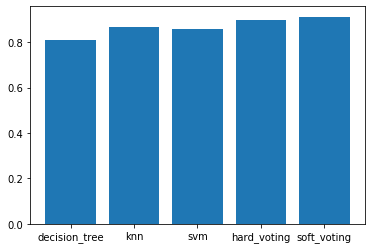

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height=[
    accuracy_score(y_test, dtree_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, hard_voting_pred),
    accuracy_score(y_test, soft_voting_pred)
])
plt.xticks(x, ['decision_tree', 'knn', 'svm', 'hard_voting', 'soft_voting'])
plt.show()